# CMSE 802 Pre-class assignment: Image Analysis
## Date: 10/26/2018
## Due: 10/29/2018; 10:30 PM

### The goal of this assignment is to learn some image morphology and do image segmentation.

---
### Your name: Boyao Zhu

---
### 1. Color Thresholding 

Use Python to read the image "chameleon02.jpg". You can name the image array im so that you don't need to change the name of input in the code provided later in this notebook.

In [1]:
# Your code:
from scipy import misc
im = misc.imread('chameleon02.jpg')
type(im)
#print (brick)

import matplotlib.pyplot
matplotlib.pyplot.imshow(im)
matplotlib.pyplot.show()

im.shape



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 640x480 with 1 Axes>

(537, 800, 3)

**As mentioned in our previous assignment, a color image consists of intensities of 3 colors: red, green, and blue. Write a code to plot the intensities of the 3 colors of the image. Subplot the red, green, and blue intensities of the image.  Plot red intensity in red color, green in green, and blue in blue if you can.   ** 

Hint: You can set the other 2 colors to be zero when plotting 1 color. 

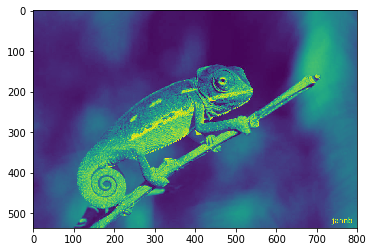

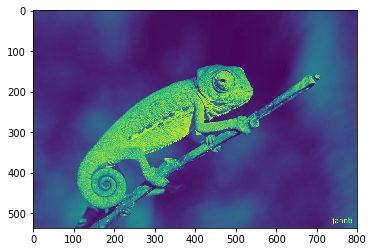

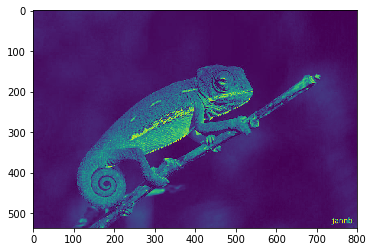

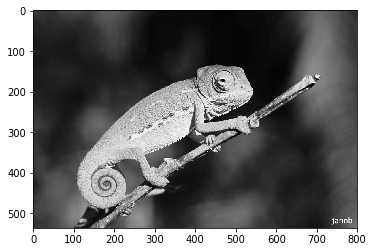

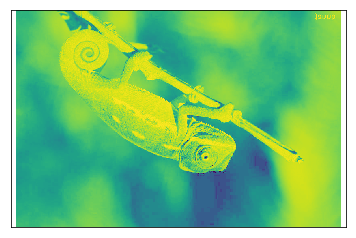

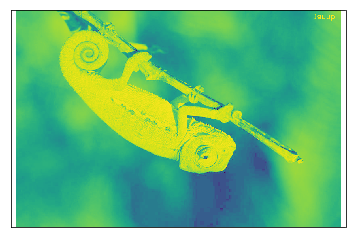

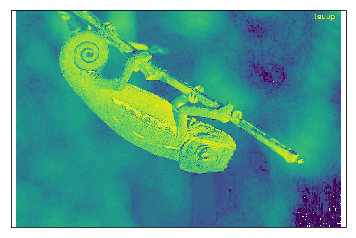

In [28]:
# Your code:
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]

import matplotlib.cm as cm 
matplotlib.pyplot.imshow(R)
matplotlib.pyplot.show()

import matplotlib.cm as cm 
matplotlib.pyplot.imshow(G)
matplotlib.pyplot.show()

import matplotlib.cm as cm 
matplotlib.pyplot.imshow(B)
matplotlib.pyplot.show()

grey = (0.2125 * R) + (0.7154 * G) + (0.0721 * B)

import matplotlib.cm as cm 
matplotlib.pyplot.imshow(grey, cmap = matplotlib.cm.Greys_r)
matplotlib.pyplot.show()

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

x = np.arange(im.shape[1])
y = np.arange(im.shape[0])



fig = plt.pcolormesh(x,y,R,norm=colors.LogNorm())
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.axis('equal')
plt.show()

fig = plt.pcolormesh(G,norm=colors.LogNorm())
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.axis('equal')
plt.show()

fig = plt.pcolormesh(B,norm=colors.LogNorm())
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.axis('equal')
plt.show()


---
The following tool creates slider bars that you can use to play with the bounds on each of the color channels (red, green and blue).  

** Move the sliders to find the best values (you think) for extracting the profile of the chameleon. **

In [39]:
from ipywidgets import interact,fixed

def color_threshold(im, rmin=0,rmax=255,gmin=0,gmax=255,bmin=0,bmax=255):
    # Pull out the red, gree and blue matrixes
    r = im[:,:,0];
    g = im[:,:,1];
    b = im[:,:,2];
    b_img = ((r > rmin) & (r < rmax) & 
             (g > gmin) & (g < gmax) & 
             (b > bmin) & (b < bmax));
    print("rmin="+str(rmin))
    print("rmax="+str(rmax))
    print("gmin="+str(gmin))
    print("gmax="+str(gmax))
    print("bmin="+str(bmin))
    print("bmax="+str(bmax))
    plt.figure(figsize = (10,20))
    plt.imshow(b_img);
    plt.show()
    return b_img;

w = interact(color_threshold, im=fixed(im),
         rmin=(-1,256), rmax=(-1,256), 
         gmin=(-1,256), gmax=(-1,256), 
         bmin=(-1,256), bmax=(-1,256),__manual=True);
'''            
w = interact(color_threshold, im=fixed(im),
         rmin=(0), rmax=(129), 
         gmin=(0), gmax=(127), 
         bmin=(0), bmax=(127),__manual=True);
'''

interactive(children=(IntSlider(value=0, description='rmin', max=256, min=-1), IntSlider(value=255, descriptio…

'            \nw = interact(color_threshold, im=fixed(im),\n         rmin=(0), rmax=(129), \n         gmin=(0), gmax=(127), \n         bmin=(0), bmax=(127),__manual=True);\n'

Write a code that uses the values of color thresholding you selected to generate a binary image which is True for pixels in the chameleon and False everywhere else.

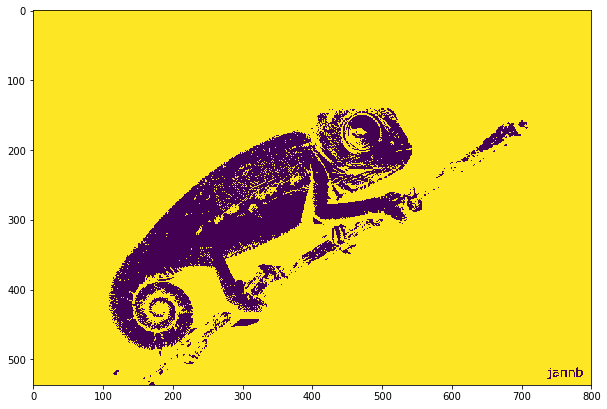

In [84]:
# Your code:

threshold = 150

#b = 1.0 * (B>threshold)
#r = 1.0 * (R>threshold)
g = 1.0 * (G<threshold)
'''
A = np.zeros((537,800,3))
A[:,:,0] = r
A[:,:,1] = g
A[:,:,2] = b
'''
import matplotlib.cm as cm 
plt.figure(figsize = (10,20))
matplotlib.pyplot.imshow(g)
matplotlib.pyplot.show()




  


---
### 2. Dilation and Erosion
How can we make the above images look better?  We will use two "Binary Image Morphology" operators called Dilation and Erosion that can "grow" and "shrink" the true regions in our above image.  Watch the following video on dilation.

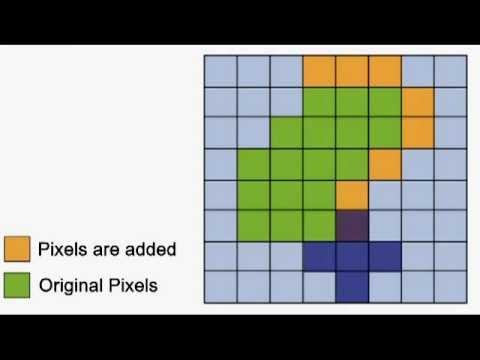

In [33]:
# Dilation
from IPython.display import YouTubeVideo
YouTubeVideo("xO3ED27rMHs",width=640,height=360)

**Let's do some practice on binary_dilation. ** Investigate scipy library for binary_dilation( ). Iterate dilation 3 times of the binary image your obtained in the previous cell, and imshow the result.

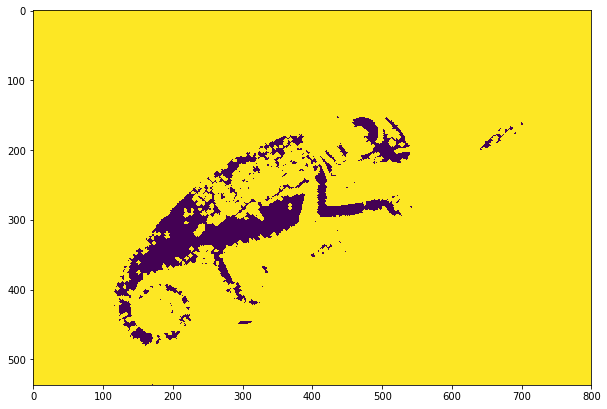

In [85]:
# Your code:
from scipy import ndimage
ndimage.binary_dilation(g)
g1 = ndimage.binary_dilation(g).astype(g.dtype)
ndimage.binary_dilation(g1)
g2 = ndimage.binary_dilation(g1).astype(g1.dtype)
ndimage.binary_dilation(g2)
g3 = ndimage.binary_dilation(g2).astype(g2.dtype)

import matplotlib.cm as cm 
plt.figure(figsize = (10,20))
matplotlib.pyplot.imshow(g3)
matplotlib.pyplot.show()


---
**Watch the video of erosion. **

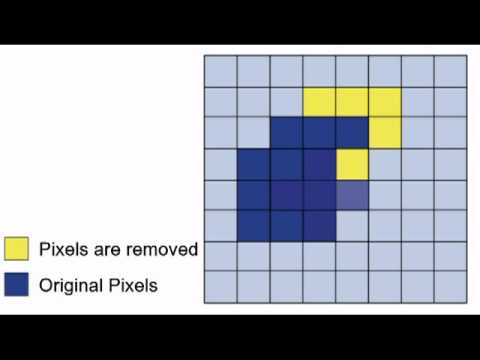

In [82]:
#Erosion
from IPython.display import YouTubeVideo
YouTubeVideo("fmyE7DiaIYQ",width=640,height=360)

**Let's do some practice on binary_erosion. ** Investigate scipy library for binary_erosion( ). Iterate erosion 5 times of the dilated binary image in the previous cell, and imshow the result.

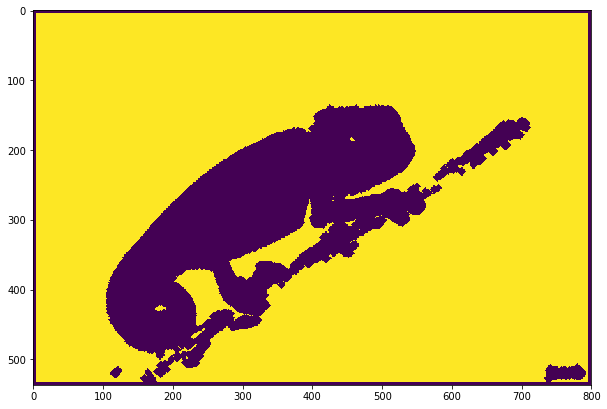

In [90]:
# Your code:

g1 = ndimage.binary_erosion(g).astype(g.dtype)
g2 = ndimage.binary_erosion(g1).astype(g1.dtype)
g3 = ndimage.binary_erosion(g2).astype(g2.dtype)
g4 = ndimage.binary_erosion(g3).astype(g3.dtype)
g5 = ndimage.binary_erosion(g4).astype(g4.dtype)

import matplotlib.cm as cm 
plt.figure(figsize = (10,20))
matplotlib.pyplot.imshow(g5)
matplotlib.pyplot.show()

---
** Finally, (1) play with the dilation and erosion functions with some numbers of iterations to find out the best profile you think that captures the chameleon. (2) Plot a new image where only the pixels within the profile of chameleon is shown. ** Hint: You can set the intensities of colors to be zero in the pixels that have False in the bindary image data.



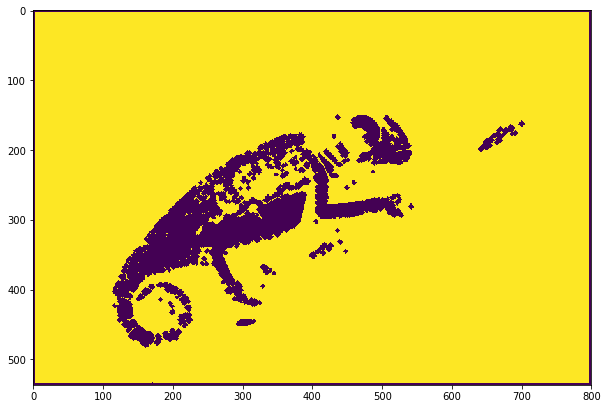

In [92]:
# Your code:
#ndimage.binary_dilation(g)
g1 = ndimage.binary_dilation(g).astype(g.dtype)
#ndimage.binary_dilation(g1)
g2 = ndimage.binary_dilation(g1).astype(g1.dtype)
#ndimage.binary_dilation(g2)
g3 = ndimage.binary_dilation(g2).astype(g2.dtype)

g1 = ndimage.binary_erosion(g3).astype(g3.dtype)
g2 = ndimage.binary_erosion(g1).astype(g1.dtype)
g3 = ndimage.binary_erosion(g2).astype(g2.dtype)
#g4 = ndimage.binary_erosion(g3).astype(g3.dtype)
#g5 = ndimage.binary_erosion(g4).astype(g4.dtype)

import matplotlib.cm as cm 
plt.figure(figsize = (10,20))
matplotlib.pyplot.imshow(g3)
matplotlib.pyplot.show()

---
### Congratulations, you're done with the pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20181029, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!